In [1]:
import pandas as pd

#讀文件
df = pd.read_csv('AAPL.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10470,2022-06-23,136.820007,138.589996,135.630005,138.270004,138.270004,72433800
10471,2022-06-24,139.899994,141.910004,139.770004,141.660004,141.660004,89047400
10472,2022-06-27,142.699997,143.490005,140.970001,141.660004,141.660004,70207900
10473,2022-06-28,142.130005,143.419998,137.320007,137.440002,137.440002,67083400


In [2]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10470,2022-06-23,138.270004
10471,2022-06-24,141.660004
10472,2022-06-27,141.660004
10473,2022-06-28,137.440002


In [3]:
df['Date']

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10470    2022-06-23
10471    2022-06-24
10472    2022-06-27
10473    2022-06-28
10474    2022-06-29
Name: Date, Length: 10475, dtype: object

In [4]:
# 把str 轉成datetime
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year = year, month = month, day = day)

datetime_object = str_to_datetime('1986-04-17')
datetime_object

datetime.datetime(1986, 4, 17, 0, 0)

In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\enoma\AppData\Local\Temp\ipykernel_3616\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10470   2022-06-23
10471   2022-06-24
10472   2022-06-27
10473   2022-06-28
10474   2022-06-29
Name: Date, Length: 10475, dtype: datetime64[ns]

In [6]:
# 把Date變為index
df.index = df.pop('Date') #唔要個Date column, 但return返個date column去index
df

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2022-06-23,138.270004
2022-06-24,141.660004
2022-06-27,141.660004


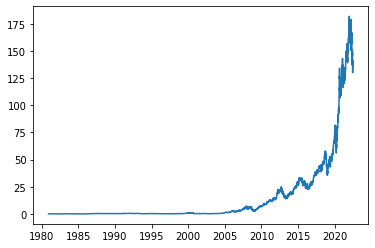

In [7]:
import matplotlib.pyplot as plt
plt.plot  (df.index, df['Close']) # index 與 Close 的圖


In [17]:
import numpy as np

#n係幾多日之前 
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2017-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2017-03-25,34.959999,35.355000,35.230000,35.160000
1,2017-03-28,35.230000,35.160000,35.220001,35.950001
2,2017-03-29,35.160000,35.220001,35.950001,36.029999
3,2017-03-30,35.220001,35.950001,36.029999,35.982498
4,2017-03-31,35.950001,36.029999,35.982498,35.915001
...,...,...,...,...,...
1253,2022-03-17,150.619995,155.089996,159.589996,160.619995
1254,2022-03-18,155.089996,159.589996,160.619995,163.979996
1255,2022-03-21,159.589996,160.619995,163.979996,165.380005
1256,2022-03-22,160.619995,163.979996,165.380005,168.820007


In [18]:
#變為NP array先可以放入去

def windowed_df_to_date_X_y(windowed_dataframe):
  #把數變為np
  df_as_np = windowed_dataframe.to_numpy()

  # 拿所有的column, 比返第一個column
  dates = df_as_np[:, 0]

  # 拿所有的column, 第一行[0]唔要, 由[1]開始一直去, 最後一行都唔要
  middle_matrix = df_as_np[:, 1:-1]
  # 第一維度是日子的長度,  第二維度是全個middle matrix, 第三維度是資料的類別數目, 我們只用close price, 所以是1
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  # 結果是Y, 是df的最後一行
  Y = df_as_np[:, -1]

  # 比返個 時間, 資料和結果出黎
  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1258,), (1258, 3, 1), (1258,))

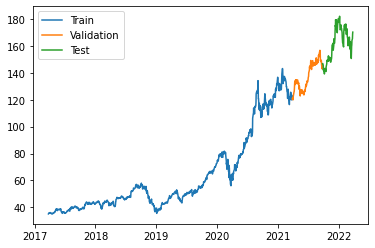

In [19]:

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

# 8成資料用作training
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
# 1成之料做validation test
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
# 1成資料做test
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


model = Sequential([layers.Input((3, 1)),# 3個資料去出一個結果
                    layers.LSTM(64), # 
                    layers.Dense(32, activation='relu'), 
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])#出一個結果

model.compile(loss='mse', # Mean squared error 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
# 
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500)

Epoch 1/500
32/32 [==============================] - 2s 17ms/step - loss: 4833.3940 - mean_absolute_error: 63.0523 - val_loss: 18628.1074 - val_mean_absolute_error: 136.1105
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 4317.0620 - mean_absolute_error: 58.5797 - val_loss: 16481.5586 - val_mean_absolute_error: 127.9717
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 2241.8154 - mean_absolute_error: 35.0553 - val_loss: 7570.3408 - val_mean_absolute_error: 86.3987
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 903.9859 - mean_absolute_error: 24.3228 - val_loss: 5573.0459 - val_mean_absolute_error: 73.9699
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 809.7540 - mean_absolute_error: 22.1973 - val_loss: 5043.5786 - val_mean_absolute_error: 70.3118
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 362.6906 - mean_absolute_error: 11.2218 - val_loss: 1719.4801 - val_m

32/32 [==============================] - 0s 1ms/step


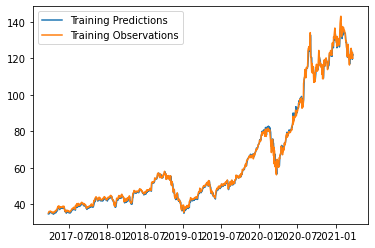

In [21]:
#呢個係個predition 出返個數
train_predictions = model.predict(X_train).flatten()

# train_
plt.plot(dates_train, train_predictions, )
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 [==============================] - 0s 2ms/step


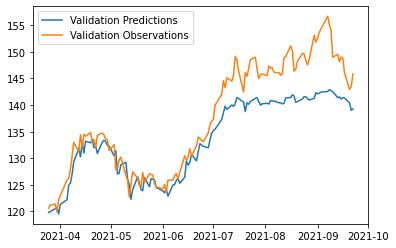

In [22]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 2ms/step


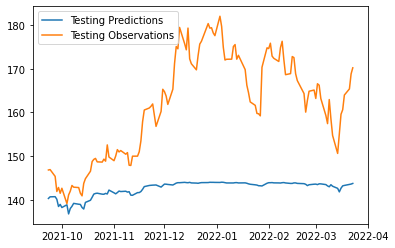

In [23]:
test_predictions = model.predict(X_test).flatten()

# test_
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

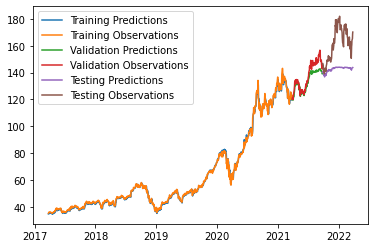

In [24]:
# 圖表plot出所有實際的價錢線與測驗線
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [45]:
from copy import deepcopy

# 呢個係可以估長線既, 但事實上係無乜用

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

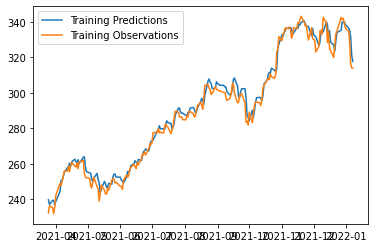

In [48]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 
            'Training Observations',
            ])


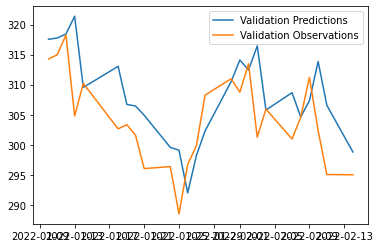

In [49]:

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend([
            'Validation Predictions', 
            'Validation Observations',
            ])


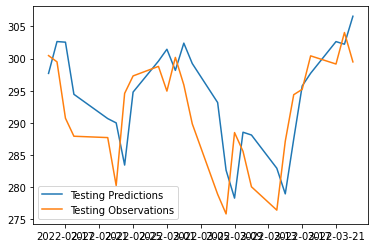

In [50]:

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend([
            'Testing Predictions', 
            'Testing Observations',
            ])


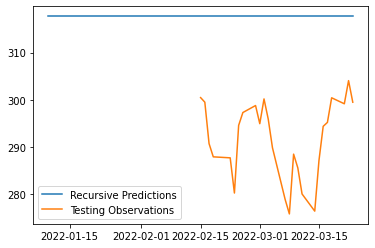

In [52]:

plt.plot(recursive_dates, recursive_predictions)
plt.plot(dates_test, y_test)
plt.legend([
            'Recursive Predictions',
             'Testing Observations'])

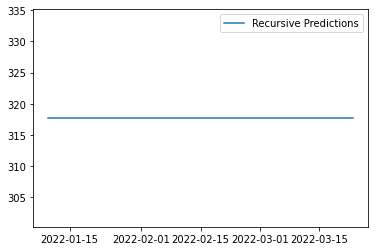

In [47]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])